# BCB546X Python Assignment

Zihao Zheng; 11/16/2018

In [111]:
######################## Python Translate Script ########################

In [112]:
from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd

In [113]:
#%%%%%%%%%%%%%%%#
### FUNCTIONS ###
#%%%%%%%%%%%%%%%#

1. Documenting Dr.X's function

In [114]:
def get_sequences_from_file(fasta_fn): # define a function called "get_sequences_from_file()", which takes a parameter "fasta_fn"
    sequence_data_dict = {} # create a empty dictionary for later use
    for record in SeqIO.parse(fasta_fn, "fasta"): # start a for loop to iterate through each record in the input fasta file, parsed by SeqIO.parse()
        description = record.description.split() # split each record (with white space as delimiter) and store them in a list called "description"
        species_name = description[1] + " " + description[2] # take the second and thrid elements in the splited string, seperated by white space, and store in a list called "species_name" 
        sequence_data_dict[species_name] = record.seq # for the dictionary created earlier, use the species_name as key, and the record as value
    return(sequence_data_dict) # return the dictionary after looping through all the record in the parsed fasta file


2. Write a string-translation function

pseudo-code: 

def translate_function(string_nucleotides): 
     mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] # this should work using BioPython (be sure to check what this returns)
     for-loop through every 3rd position in string_nucleotides to get the codon using range subsets
         # IMPORTANT: if the sequence has a stop codon at the end, you should leave it off
         #this is how you can retrieve the amino acid: mito_table.forward_table[codon]
         add the aa to aa_seq_string
     return(aa_seq_string)

In [115]:
def translate_function(string_nucleotides): # define a function called "translate_function()", which takes string_nucleotides (a string of nucleotides) as parameter
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] # get the codon table for Vertebrate Mitochondrial
    n = 3
    codon = [string_nucleotides[i:i+n] for i in range(0, len(string_nucleotides), n)] # loop through the string of nucleotides, split them every three positions, store them in a list called codon
    stop_codon = ['TAG','TAA','TGA'] # create a list of stop codon
    aa_seq_string = [] # create a empty list 
    for element in codon: # loop through list codon
        if element in stop_codon: 
            break # stop when hitting a stop codon
        else:
            aa = mito_table.forward_table[element] # retrieve the corresponding amino acid for each element
            aa_seq_string.append(aa) # add the aa to the list aa_seq_string
    return (aa_seq_string) # return the list aa_seq_string
  

3. Write an alternative function for string translation

In [116]:
def translate_function_alt(string_nucleotides): # this alternative function use Biopython libraries to translate DNA into amino acid
    from Bio.Seq import Seq
    from Bio.Alphabet import generic_dna
    coding_dna = Seq(string_nucleotides, generic_dna)
    return (coding_dna.translate())

4. Write an a count AA anaylsis function

In [117]:
def aa_molecular_weight(aa_seq): # again use Biopython library
    from Bio.SeqUtils.ProtParam import ProteinAnalysis
    analysed_seq = ProteinAnalysis(aa_seq)
    return (analysed_seq.molecular_weight())

5. Write a function that calculates the GC-content

In [118]:
def count_gc(string_nucleotides): # take a string for parameter
    dna_list = list(string_nucleotides.upper()) # convert the string to list
    gc_count = dna_list.count("G") + dna_list.count("C") # count number of G and C in the sequence
    gc_fraction = float(gc_count) / len(string_nucleotides) # calculate the percentage of G and C in the sequence
    return (100 * gc_fraction) # return the percentage

In [119]:
#%%%%%%%%%%%%%%#
###   MAIN   ###
#%%%%%%%%%%%%%%#

In [120]:
cytb_seqs = get_sequences_from_file("bears_cytb.fasta") # retrieve species name and sequence using get_sequences_from_file() function from SeqIO library

In [121]:
bears_df = pd.read_csv("bears_mass.csv") # Includes only data for body mass 

In [122]:
species_list = list(bears_df.species) # put the column "species" in bears_df into a list called species_list

In [123]:
bears_df['mol_weight'] = 'NaN'
bears_df['gc_content']= 'NaN'

6. Add two new columns to the bears DataFrame: (1) molecular weight and (2) GC content.

7.Write a for-loop that translates each sequence and also gets molecular weight and computes the GC content of each translated sequence and adds those data to DataFrame.

In [124]:
from Bio.SeqUtils import GC
from Bio.SeqUtils import molecular_weight

i = 0
for key, value in cytb_seqs.items():
    aa_seq = value.translate()
    mol_weight = molecular_weight(value)
    gc_content = GC(value)
    bears_df['mol_weight'][i] = mol_weight
    bears_df['gc_content'][i] = gc_content
    i = i + 1

/Users/zhzheng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/zhzheng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


8. Plot a bar-chart of the mass with the x-axes labeled with species names.

In [125]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

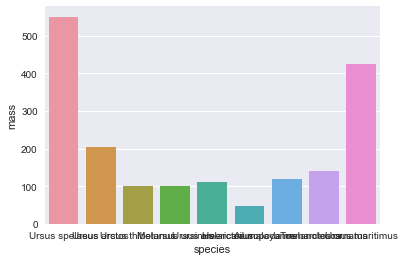

In [126]:
ax = sns.barplot(x="species", y="mass", data=bears_df)

*Q1* What is the largest bear species? 
*A1* Ursus spelaeus

*Q2* What else is interesting about this species?
*A1* It has a relatively low molecular weight in Ursus family

9.Plot a visualization of the molecular weight (y-axis) as a function of GC-content (x-axis).

TypeError: No loop matching the specified signature and casting
was found for ufunc svd_n_s

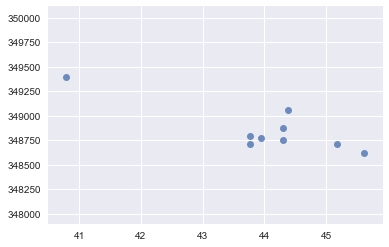

In [127]:
ax = sns.regplot(x="gc_content", y="mol_weight", data=bears_df)

10. Save the new DataFrame to a file called "bears_mass_cytb.csv"

In [128]:
bears_df.to_csv("bears_mass_cytb.csv", sep=',')

11. There's no relationship between mass and molecular weiht in this dataset, revealed by the plot below.

TypeError: No loop matching the specified signature and casting
was found for ufunc svd_n_s

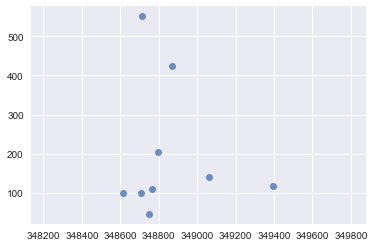

In [129]:
ax = sns.regplot(x="mol_weight", y="mass", data=bears_df)

References:

EEOB/BCB 546X: Programming with Python: https://eeob-biodata.github.io/BCB546X-python/
Package SeqIO: http://biopython.org/DIST/docs/api/Bio.SeqIO-module.html
BioPython: https://biopython.org/